In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta
sns.set()

In [215]:
crm = pd.read_csv('Sample GB Диплом Веб-аналитика - CRM.csv', parse_dates=['Order Date', 'Ship Date'])
sessions = pd.read_csv('Sample GB Диплом Веб-аналитика - sessions.csv', parse_dates=['SessionDate'])
costs = pd.read_csv('Sample GB Диплом Веб-аналитика - costs.csv', parse_dates=['Date'])

In [216]:
costs = pd.melt(costs, id_vars = ['Date', 'campaign'], 
        value_vars=['google / cpc', 'yandex / cpc', 'vkontakte / cpc']) \
        .rename(columns={'variable':'source / medium', 'value':'cost'})
costs.head()

Date   campaign source / medium  cost
0 2011-01-01      brand    google / cpc   387
1 2011-01-01  not_brand    google / cpc     0
2 2011-02-01  not_brand    google / cpc   459
3 2011-02-01      brand    google / cpc   229
4 2011-03-01  not_brand    google / cpc    66

In [217]:
def change_name(name):
    return name.replace(' / ', '_').replace(' ', '_').replace('-', '_').lower()
    
crm = crm.rename(columns=change_name)
sessions = sessions.rename(columns=change_name)
costs = costs.rename(columns=change_name)

In [218]:
crm.info()
crm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7220 entries, 0 to 7219
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   client_id             7220 non-null   object        
 1   order_id              7220 non-null   int64         
 2   order_date            7220 non-null   datetime64[ns]
 3   order_quantity        7220 non-null   int64         
 4   sales                 7220 non-null   object        
 5   discount              7220 non-null   object        
 6   ship_mode             7220 non-null   object        
 7   profit                7220 non-null   object        
 8   unit_price            7220 non-null   object        
 9   shipping_cost         7220 non-null   object        
 10  region                7220 non-null   object        
 11  product_category      7220 non-null   object        
 12  product_sub_category  7220 non-null   object        
 13  product_name      

client_id  order_id order_date  order_quantity  \
0  2b97454da406955ec40c097647e38316       130 2011-07-05               3   
1  2b97454da406955ec40c097647e38316       130 2011-07-05              29   
2  2b97454da406955ec40c097647e38316       130 2011-07-05              23   
3  59ca19169a2d00aa2466bb9c518a99e7       166 2011-11-09              10   
4  19d90e0481d1d33e94c2bd99e7d4b3fd       416 2011-09-26              20   

       sales discount ship_mode   profit unit_price shipping_cost  \
0     461,89     0,05   Express  -309,82     150,98         13,99   
1     575,11     0,02   Express    71,75      18,97          9,03   
2     236,46     0,05   Express  -134,31       9,71          9,45   
3    567,936     0,02   Express  -126,09      65,99          8,99   
4  1156,6715     0,01   Express    88,52      65,99          7,69   

             region product_category          product_sub_category  \
0  Saint-Petersburg       Technology               Office Machines   
1  Saint-Petersburg  Office Supplies                         Paper   
2  Saint-Petersburg  Office Supplies        Storage & Organization   
3            Moscow       Technology  Telephones and Communication   
4            Moscow       Technology  Telephones and Communication   

                                        product_name  ship_date  
0                   Canon MP41DH Printing Calculator 2012-09-05  
1  Computer Printout Paper with Letter-Trim Perfo... 2012-08-05  
2            Filing/Storage Totes and Swivel Casters 2012-10-05  
3                                               i270 2011-09-13  
4                                               5190 2010-01-10

In [219]:
sessions.info()
sessions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19080 entries, 0 to 19079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   client_id      19080 non-null  object        
 1   sessiondate    19080 non-null  datetime64[ns]
 2   order_id       4723 non-null   float64       
 3   transaction    18107 non-null  float64       
 4   source_medium  19080 non-null  object        
 5   campaign       8543 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 894.5+ KB


client_id sessiondate  order_id  transaction  \
0  00039fbdd03f38f626f9b1762e10b31a  2011-04-14       NaN          0.0   
1  00039fbdd03f38f626f9b1762e10b31a  2011-04-17       NaN          0.0   
2  00039fbdd03f38f626f9b1762e10b31a  2011-04-20   38117.0          1.0   
3  00039fbdd03f38f626f9b1762e10b31a  2011-05-06       NaN          0.0   
4  00039fbdd03f38f626f9b1762e10b31a  2011-08-06       NaN          0.0   

       source_medium campaign  
0  sendpulse / email     news  
1             direct      NaN  
2             direct      NaN  
3     mail / organic      NaN  
4       yandex / cpc    brand

In [220]:
# в transaction есть nan, но sessions.transaction.sum() = 4723 - совпадает с кол-вом order_id, заменим их на 0
sessions.transaction = sessions.transaction.fillna(0)

In [221]:
# проверим также есть ли дубли среди order_id
sessions.order_id.dropna().astype(str).describe()

count        4723
unique       4723
top       46337.0
freq            1
Name: order_id, dtype: object

In [222]:
#заодно проверим что с order_id в таблице из crm
crm.order_id.dropna().astype(str).describe()

count      7220
unique     4723
top       43745
freq          6
Name: order_id, dtype: object

In [223]:
costs.info() 
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2190 non-null   datetime64[ns]
 1   campaign       2190 non-null   object        
 2   source_medium  2190 non-null   object        
 3   cost           2190 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 68.6+ KB


date   campaign source_medium  cost
0 2011-01-01      brand  google / cpc   387
1 2011-01-01  not_brand  google / cpc     0
2 2011-02-01  not_brand  google / cpc   459
3 2011-02-01      brand  google / cpc   229
4 2011-03-01  not_brand  google / cpc    66

## Начальный уровень

#### 1) В каком полугодии расходы по Вконтакте больше?

In [224]:
print(costs.date.min())
print(costs.date.max())

2011-01-01 00:00:00
2011-12-31 00:00:00


In [225]:
vk = "vkontakte / cpc"
july_1 = "2011-07-01"

is_first_more = costs.query('source_medium == @vk and date < @july_1').cost.sum() > \
            costs.query('source_medium == @vk and date >= @july_1').cost.sum()

if is_first_more == True:
    print('Расходы в первом полугодии больше, чем во втором')
else:
    print('Расходы во втором полугодии больше, чем в первом')

Расходы во втором полугодии больше, чем в первом


#### 2) Рассчитайте расход без учёта НДС в рамках не брендовых рекламных кампаний за Q2

In [385]:
april_1 = "2011-04-01"
a2 = round(costs.query('campaign == "not_brand" and date >= @april_1 and date<@july_1').cost.sum() / 1.2, 1)

print(f'{a2} - расход без НДС')

69226.7 - расход без НДС


#### 3) Рассчитайте среднее количество рекламных кликов за день за год

In [227]:
sessions.source_medium.unique()

array(['sendpulse / email', 'direct', 'mail / organic', 'yandex / cpc',
       'google / cpc', 'yandex / organic', 'google / organic',
       'vkontakte / cpc'], dtype=object)

In [255]:
a3 = round(sessions.query('source_medium.str.contains(" / cp")', engine='python').shape[0] / sessions.sessiondate.nunique(), 1)

print(f'{a3} - среднее количество рекламных кликов')

18.0 - среднее количество рекламных кликов


#### 4) Рассчитайте количество уникальных пользователей, посетивших сайт за год

In [229]:
print(f'{sessions.client_id.nunique()} - уникальных пользователей за год')

1567 - уникальных пользователей за год


#### 5) Рассчитайте общее количество заказов за год

In [230]:
print( f'{sessions.transaction.sum()} - количество заказов за год')

4723.0 - количество заказов за год


## Средний уровень

#### 6) Определите лимит на расход в день для рекламы Вконтакте

In [231]:
costs.query('source_medium == @vk').groupby(['date']).agg({'cost':'sum'}).sort_values('cost', ascending=False).head()

cost
date            
2011-05-06  1717
2011-02-08  1645
2011-06-08  1634
2011-10-20  1582
2011-04-09  1569

In [232]:
# Возможно, лимит - 1700 (а в один день перекрутило)

#### 7) Определите, в какой день была самая высокая конверсия на сайте

In [233]:
sessions7 = sessions.groupby(['sessiondate']).agg({'client_id':'count', 'transaction':'sum'})
sessions7['CR'] = sessions7.transaction / sessions7.client_id

date_max_cr = datetime.strftime(sessions7.CR.idxmax(), '%d-%m-%y')
print(f'{date_max_cr} - день с самой высокой конверсией')

19-09-11 - день с самой высокой конверсией


#### 8) Рассчитайте средний LTV за год по всем клиентам

In [234]:
crm.profit = crm.profit.apply(lambda x: x.replace(',', '.')).astype(float)
a8 = crm.groupby(['client_id'], as_index=False).agg({'profit':'sum'}).profit.median()
print(f'{a8} - средний LTV')

725.58 - средний LTV


#### 9) Рассчитайте среднюю конверсию для каждого из рекламных каналов

In [375]:
sessions9 = sessions.copy()
sessions9['month'] = sessions9.sessiondate.dt.month

sessions9 = sessions9.query('source_medium.str.contains(" / cp")', engine='python')\
            .groupby(['month', 'source_medium'], as_index=False).agg({'client_id':'count', 'transaction':'sum'})\
            .rename(columns={'client_id':'sessions'})

sessions9.head()

month    source_medium  sessions  transaction
0      1     google / cpc       160         47.0
1      1  vkontakte / cpc       180         56.0
2      1     yandex / cpc       171         49.0
3      2     google / cpc       169         52.0
4      2  vkontakte / cpc       198         62.0

In [374]:
sessions9['CR'] = sessions9.transaction / sessions9.sessions
sessions9.groupby("source_medium").agg({"CR":'median'})

CR
source_medium            
google / cpc     0.309916
vkontakte / cpc  0.327851
yandex / cpc     0.300675

#### 10) Рассчитайте средний CPO в год для каждой из рекламных систем

In [376]:
costs['month'] = costs.date.dt.month

costs10 = costs.groupby(['month', 'source_medium'], as_index=False).agg({'cost':'sum'})

df10 = pd.merge(sessions9, costs10, on=['month','source_medium']) 
df10.head()

month    source_medium  sessions  transaction   cost
0      1     google / cpc       160         47.0  15890
1      1  vkontakte / cpc       180         56.0  18202
2      1     yandex / cpc       171         49.0  24644
3      2     google / cpc       169         52.0  15293
4      2  vkontakte / cpc       198         62.0  18821

In [377]:
df10['CPO'] = df10.cost / df10.transaction
df10.groupby("source_medium").agg({"CPO":'median'})

CPO
source_medium              
google / cpc     295.923077
vkontakte / cpc  324.324309
yandex / cpc     363.696324

## Сложный уровень

#### 11) Какой из каналов принес наибольший profit?

In [378]:
crm11 = crm.groupby(['order_id']).agg({'profit':'sum'})
df11 = pd.merge(sessions.query('order_id==order_id'), crm11, on='order_id')

df11.groupby('source_medium', as_index=False).agg({'profit':'sum'}).sort_values('profit', ascending=False).head(1)

source_medium     profit
5  vkontakte / cpc  232428.86

#### 12) Постройте график по дням по цене клика для каждой из систем, учитывая, что цена клика в течение дня не меняется

In [380]:
sessions12 = sessions.query('source_medium.str.contains(" / cp")', engine='python')\
            .groupby(['sessiondate', 'source_medium'], as_index=False).agg({"client_id":'count'})\
            .rename(columns={'sessiondate':'date', 'client_id':'clicks'})

costs12 = costs.groupby(['date','source_medium']).agg({'cost':'sum'})

df12 = pd.merge(sessions12, costs12, on=['date','source_medium']).sort_values('date')
df12['CPC'] = df12.cost / df12.clicks
df12.head()

date    source_medium  clicks  cost         CPC
0 2011-01-01     google / cpc       2   387  193.500000
1 2011-01-01  vkontakte / cpc       7   419   59.857143
2 2011-01-01     yandex / cpc       4   590  147.500000
3 2011-01-02     google / cpc       5   108   21.600000
4 2011-01-02  vkontakte / cpc       8   477   59.625000

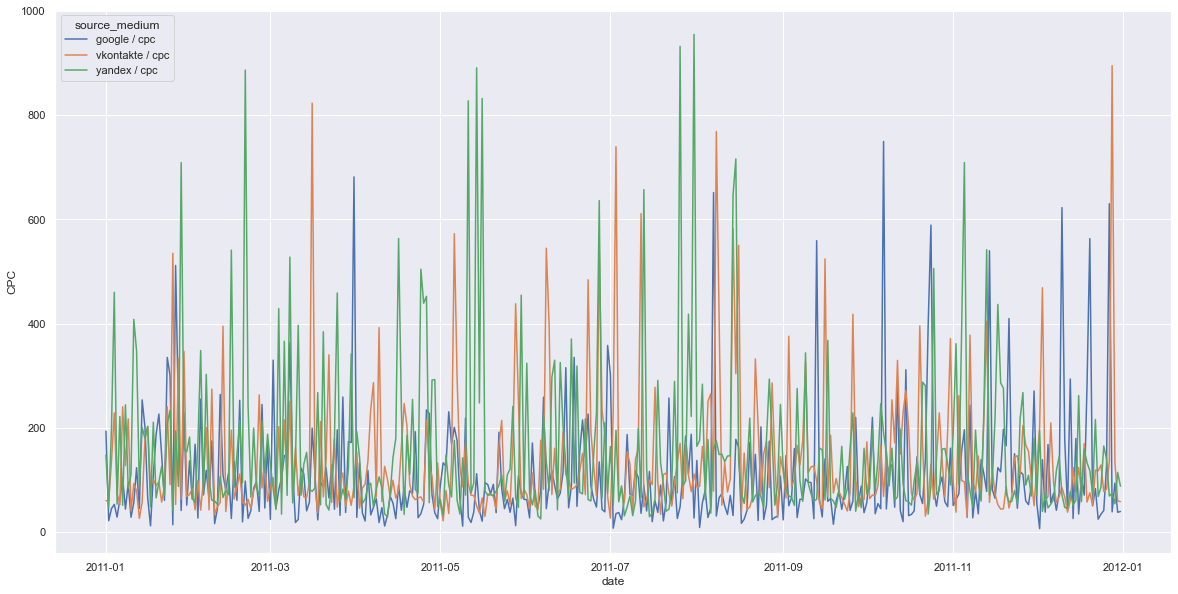

In [381]:
plt.figure(figsize = (20, 10))
sns.lineplot(x=df12.date, y=df12.CPC, hue=df12.source_medium);

In [ ]:
#Как-то не очень график. По месяцам бы еще нормально выглядело. Это ли нужно было получить?

#### 13) Рассчитайте средний ROI по месяцам для каждой из рекламных систем

In [299]:
#Воспользуемся уже полученными таблицами
df10.head()

month    source_medium  client_id  transaction        CR   cost         CPO
0      1     google / cpc        160         47.0  0.293750  15890  338.085106
1      1  vkontakte / cpc        180         56.0  0.311111  18202  325.035714
2      1     yandex / cpc        171         49.0  0.286550  24644  502.938776
3      2     google / cpc        169         52.0  0.307692  15293  294.096154
4      2  vkontakte / cpc        198         62.0  0.313131  18821  303.564516

In [295]:
df11.head()

client_id sessiondate  order_id  transaction  \
0  00039fbdd03f38f626f9b1762e10b31a  2011-04-20   38117.0          1.0   
1  00039fbdd03f38f626f9b1762e10b31a  2011-10-06   43874.0          1.0   
2  00039fbdd03f38f626f9b1762e10b31a  2011-11-10    9926.0          1.0   
3  00a7fb7251c04c8f17593a3c7a779d82  2011-08-28    6336.0          1.0   
4  00a7fb7251c04c8f17593a3c7a779d82  2011-09-26   19075.0          1.0   

      source_medium   campaign  profit  
0            direct        NaN -128.89  
1      google / cpc  not_brand -161.21  
2  yandex / organic        NaN  -56.97  
3  google / organic        NaN  -84.13  
4            direct        NaN   12.95

In [382]:
df11['month'] = df11.sessiondate.dt.month
df13 = df11.query('source_medium.str.contains(" / cp")', engine='python')\
        .groupby(['month','source_medium'], as_index=False).agg({'profit':'sum'})

df13 = pd.merge(df13, df10, on= ['month','source_medium'])
df13['ROI'] = 100* round((df13.profit - df13.cost) / df13.cost, 4)
df13.head()

month    source_medium    profit  sessions  transaction   cost         CPO  \
0      1     google / cpc  18207.35       160         47.0  15890  338.085106   
1      1  vkontakte / cpc  15033.00       180         56.0  18202  325.035714   
2      1     yandex / cpc   9847.50       171         49.0  24644  502.938776   
3      2     google / cpc  18421.93       169         52.0  15293  294.096154   
4      2  vkontakte / cpc  40936.22       198         62.0  18821  303.564516   

      ROI  
0   14.58  
1  -17.41  
2  -60.04  
3   20.46  
4  117.50

In [383]:
pivtbl13 = df13.pivot_table(index='month', columns='source_medium', values='ROI')
pivtbl13

source_medium  google / cpc  vkontakte / cpc  yandex / cpc
month                                                     
1                     14.58           -17.41        -60.04
2                     20.46           117.50        -86.68
3                     69.05           -10.68         32.83
4                     41.67            53.19        -74.64
5                     64.15           -16.48         41.70
6                   -117.73            48.21        -19.32
7                    -13.04            66.86        -89.11
8                    -65.81           -77.16         -8.68
9                    253.31            11.10        -46.80
10                  -111.18           -16.55        -31.17
11                   -34.75            -1.00       -130.24
12                    27.79          -163.56          1.38

#### 14) Рассчитайте средний ДРР для каждого типа рекламных кампаний по кварталам


In [352]:
df11['quarter'] = df11.sessiondate.dt.quarter
df14 = df11.query('source_medium.str.contains(" / cp")', engine='python')\
        .groupby(['quarter','campaign'], as_index=False).agg({'profit':'sum'})
df14

quarter   campaign     profit
0        1      brand  124867.81
1        1  not_brand   58777.13
2        2      brand   67837.48
3        2  not_brand  100964.71
4        3      brand   75067.02
5        3  not_brand   87383.44
6        4      brand   31704.97
7        4  not_brand   51292.62

In [353]:
costs['quarter'] = costs.date.dt.quarter
costs14 = costs.groupby(['quarter', 'campaign'], as_index=False).agg({'cost':'sum'})

df14 = pd.merge(df14, costs14, on= ['quarter','campaign'])
df14['ДДР'] = 100* round(df14.cost/df14.profit, 4)

pivtbl14 = df14.pivot_table(index='quarter', columns='campaign', values='ДДР')
pivtbl14

campaign   brand  not_brand
quarter                    
1          72.67     142.72
2         129.27      82.28
3         115.24      90.67
4         286.75     173.57

#### 15) Постройте диаграмму, которая отображает распределение регионов заказов и рекламных систем, привлекших эти заказы

In [384]:
crm15 = crm.groupby(['order_id']).agg({'region':'max'})
df15 = pd.merge(sessions.query('order_id==order_id'), crm15, on='order_id')
df15 = df15.query('source_medium.str.contains(" / cp")', engine='python')
df15.head()

client_id sessiondate  order_id  transaction  \
1   00039fbdd03f38f626f9b1762e10b31a  2011-10-06   43874.0          1.0   
5   00a7fb7251c04c8f17593a3c7a779d82  2011-11-16   22404.0          1.0   
9   00f9b72300bf715dc97f0b32f3854f25  2011-01-08     610.0          1.0   
15  014d7b692d2d5ea2de19be3f0da2fabc  2011-01-08   13988.0          1.0   
25  01a9621046642a9d7cbfeb3c78c0ddf7  2011-01-25    7043.0          1.0   

      source_medium   campaign            region  
1      google / cpc  not_brand     Leningrad Obl  
5      google / cpc  not_brand     Leningrad Obl  
9   vkontakte / cpc  not_brand     Leningrad Obl  
15     google / cpc      brand     Leningrad Obl  
25     google / cpc  not_brand  Saint-Petersburg

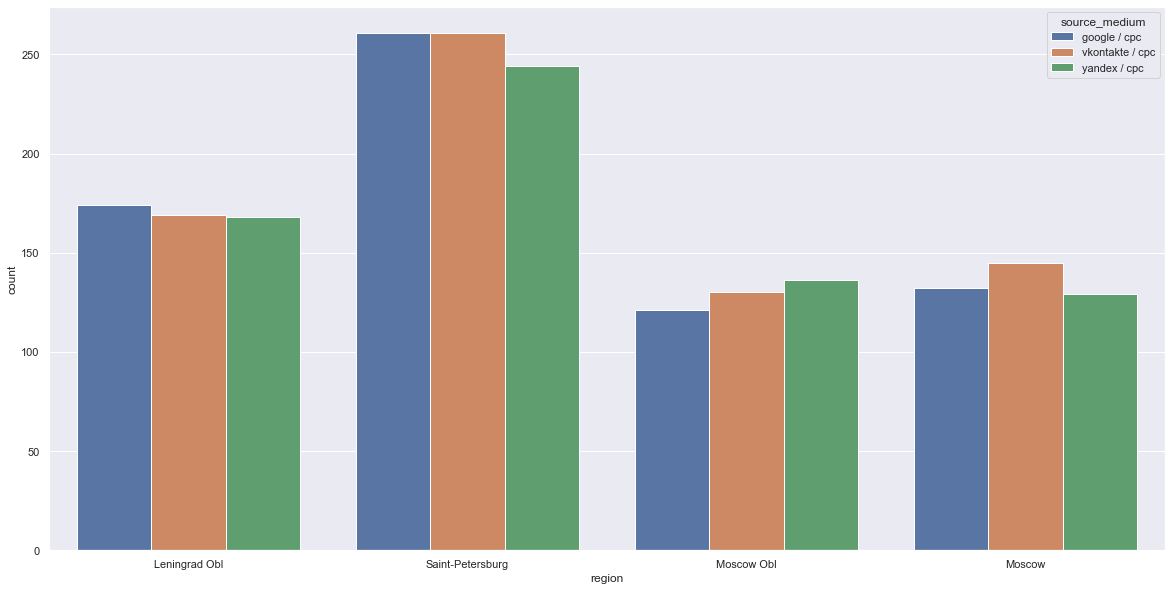

In [370]:
plt.figure(figsize = (20, 10))
sns.countplot(x=df15.region, hue=df15.source_medium);